In [21]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm

In [10]:
X = np.random.randn(5, 5)
X

array([[-1.25939405,  0.04534647, -0.65525775, -0.37182031, -0.42125689],
       [ 0.70140021,  0.64110097,  0.31699105,  1.36933589, -1.21722231],
       [ 0.79780608, -1.95054988,  0.29864318,  2.19711711,  0.12976125],
       [-1.66974841, -0.36900854, -0.37568992, -0.29368516, -0.59523912],
       [ 0.42106248,  1.51300726, -1.14060122, -0.09406715, -0.87719681]])

In [11]:
distances = cosine_distances(X)
distances

array([[0.        , 1.33182316, 1.46195726, 0.05867609, 0.78806423],
       [1.33182316, 0.        , 0.6473823 , 1.30805743, 0.58609725],
       [1.46195726, 0.6473823 , 0.        , 1.25241311, 1.50190289],
       [0.05867609, 1.30805743, 1.25241311, 0.        , 1.0709145 ],
       [0.78806423, 0.58609725, 1.50190289, 1.0709145 , 0.        ]])

In [33]:
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        print(1 - np.dot(X[i], X[j]) / (norm(X[i]) * norm(X[j])), end = ' ')
    print()

2.220446049250313e-16 1.3318231630801411 1.4619572564836687 0.0586760859385459 0.7880642251305533 
1.3318231630801411 -2.220446049250313e-16 0.647382299054093 1.308057426074202 0.5860972511203869 
1.4619572564836687 0.647382299054093 0.0 1.2524131146297628 1.5019028937389314 
0.0586760859385459 1.308057426074202 1.2524131146297628 0.0 1.0709145024471212 
0.7880642251305533 0.5860972511203869 1.5019028937389314 1.0709145024471212 -2.220446049250313e-16 


In [25]:
neigh = NearestNeighbors(n_neighbors = 3, metric = 'cosine')
neigh.fit(X)

In [32]:
for elem in X:
    print(neigh.kneighbors([elem]))

(array([[0.        , 0.05867609, 0.78806423]]), array([[0, 3, 4]]))
(array([[0.        , 0.58609725, 0.6473823 ]]), array([[1, 4, 2]]))
(array([[0.        , 0.6473823 , 1.25241311]]), array([[2, 1, 3]]))
(array([[0.        , 0.05867609, 1.0709145 ]]), array([[3, 0, 4]]))
(array([[0.        , 0.58609725, 0.78806423]]), array([[4, 1, 0]]))


In [34]:
neigh.kneighbors([X[0]], return_distance = False)

array([[0, 3, 4]])

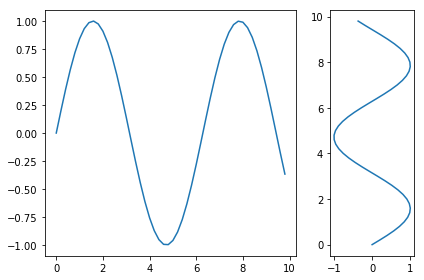

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
f, (a0, a1) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})
a0.plot(x,y)
a1.plot(y,x)

f.tight_layout()

In [53]:
img = np.random.random((100, 100))

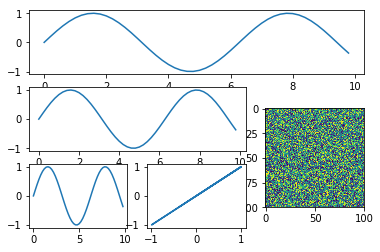

In [54]:
gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])
ax1.plot(x, y)
ax2.plot(x, y)
#ax3.plot(x, y)
ax3.imshow(img)
ax4.plot(x, y)
ax5.plot(y, y)

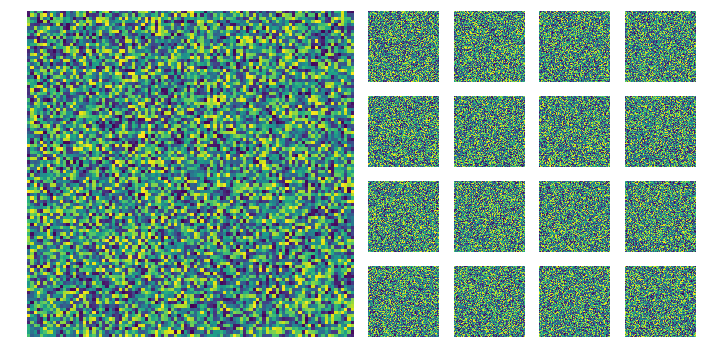

In [65]:
plt.figure(figsize = (12, 6))
gs = gridspec.GridSpec(4, 8)
ax_big = plt.subplot(gs[:, :-4])
ax_big.axis('off')
ax_grid = [[plt.subplot(gs[i, j]) for j in range(4, 8)] for i in range(4)]
ax_big.imshow(np.random.random((100, 100)))
for ax_line in ax_grid:
    for ax_cell in ax_line:
        ax_cell.imshow(np.random.random((100, 100)))
        ax_cell.axis('off')